In [1]:
import tensorflow as tf

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

# Import packages

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Load data

In [4]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')



68608000/68606236 [==============================] - 907s 13us/step


In [9]:
cats_and_dogs_filtered
train
cats: [cat.0.jpg, cat.1.jpg, cat.2.jpg ....]
dogs: [dog.0.jpg, dog.1.jpg, dog.2.jpg ...]
validation
cats: [cat.2000.jpg, cat.2001.jpg, cat.2002.jpg ....]
dogs: [dog.2000.jpg, dog.2001.jpg, dog.2002.jpg ...]


SyntaxError: invalid syntax (<ipython-input-9-6ddabe41ddfb>, line 3)

# After extracting its contents, assign variables with the proper file path for the training and validation set

In [10]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures


# Understand the data

# Let's look at how many cats and dogs images are in the training and validation directory:

In [11]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [12]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


# For convenience, set up variables to use while pre-processing the dataset and training the network.

In [13]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150


# Data preparation

In [14]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data


In [15]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')


Found 2000 images belonging to 2 classes.


In [16]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')


Found 1000 images belonging to 2 classes.


# Visualize training images

In [17]:
sample_training_images, _ = next(train_data_gen)


In [18]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


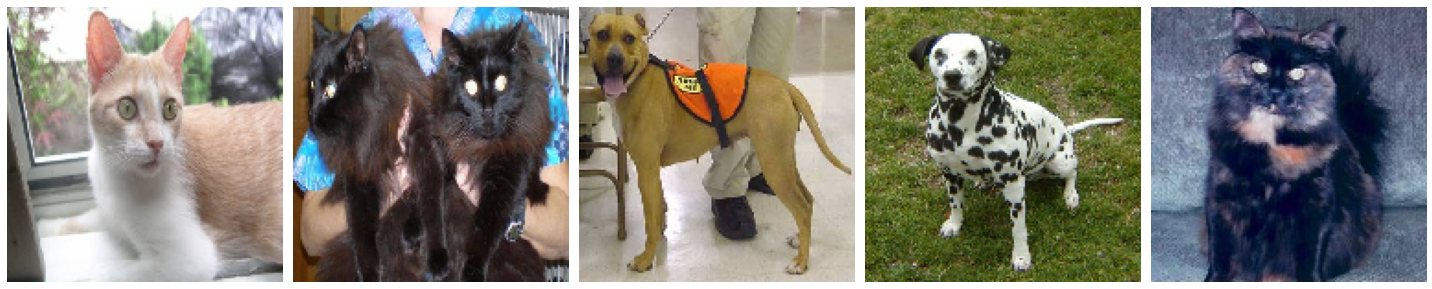

In [19]:
plotImages(sample_training_images[:5])


# Create the model

In [20]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


# Compile the model

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Model summary

In [22]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

# Train the model

Use the fit_generator method of the ImageDataGenerator class to train the network.



In [23]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)


Epoch 1/15
15/15 [==============================] - 33s 2s/step - loss: 1.0586 - acc: 0.5160 - val_loss: 0.6943 - val_acc: 0.5067
Epoch 2/15
15/15 [==============================] - 32s 2s/step - loss: 0.6913 - acc: 0.5021 - val_loss: 0.6916 - val_acc: 0.5089
Epoch 3/15
15/15 [==============================] - 31s 2s/step - loss: 0.6765 - acc: 0.5144 - val_loss: 0.6714 - val_acc: 0.5089
Epoch 4/15
15/15 [==============================] - 31s 2s/step - loss: 0.6337 - acc: 0.5919 - val_loss: 0.6266 - val_acc: 0.6931
Epoch 5/15
15/15 [==============================] - 31s 2s/step - loss: 0.5759 - acc: 0.6843 - val_loss: 0.5899 - val_acc: 0.6797
Epoch 6/15
15/15 [==============================] - 31s 2s/step - loss: 0.5344 - acc: 0.7094 - val_loss: 0.5804 - val_acc: 0.6741
Epoch 7/15
15/15 [==============================] - 31s 2s/step - loss: 0.4888 - acc: 0.7391 - val_loss: 0.5665 - val_acc: 0.6931
Epoch 8/15
15/15 [==============================] - 31s 2s/step - loss: 0.4452 - acc: 0.78

# Visualize training results

Now visualize the results after training the network.



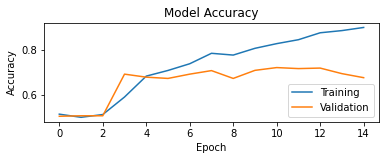

In [29]:
plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')


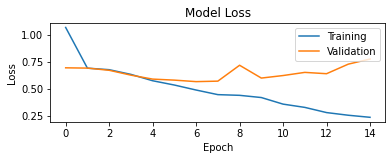

In [30]:
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')


In [31]:
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [32]:
plt.show()

# Data augmentation

# Augment and visualize data

# Apply horizontal flip

In [27]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)



In [33]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))



Found 2000 images belonging to 2 classes.


In [34]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]


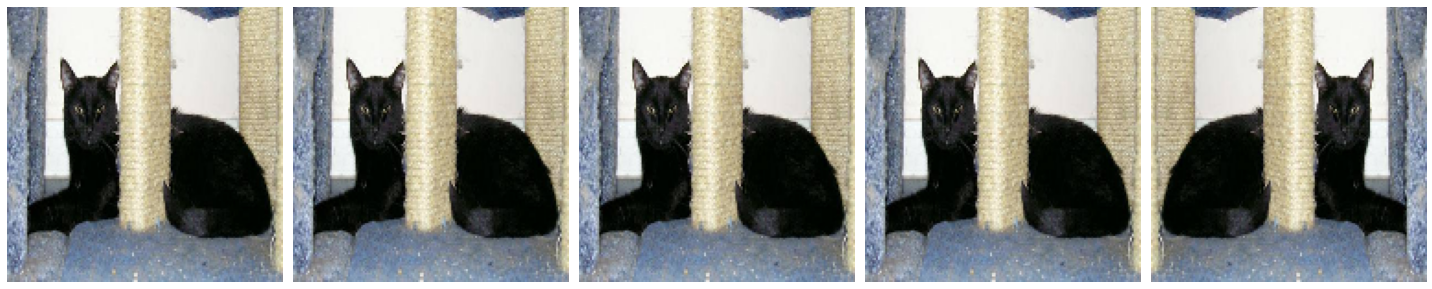

In [35]:
# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImages(augmented_images)


# Randomly rotate the image
Let's take a look at a different augmentation called rotation and apply 45 degrees of rotation randomly to the training examples

In [36]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)


In [37]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]


Found 2000 images belonging to 2 classes.


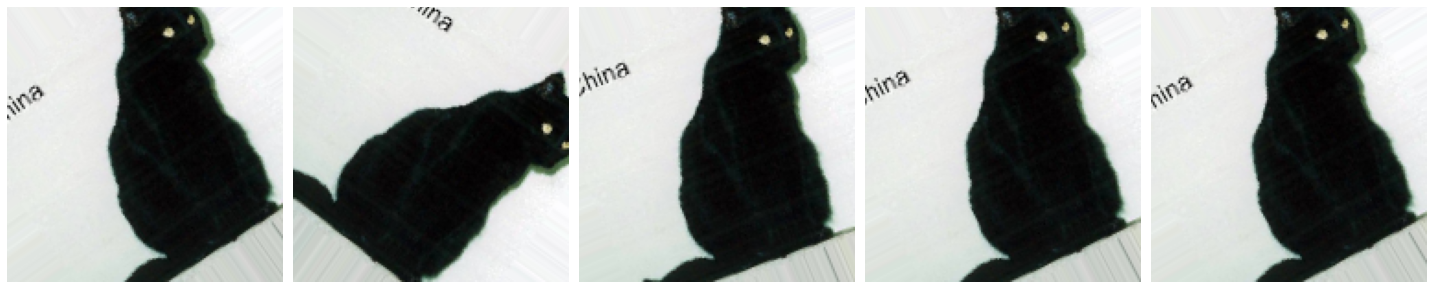

In [38]:
plotImages(augmented_images)


# Apply zoom augmentation
Apply a zoom augmentation to the dataset to zoom images up to 50% randomly.

In [39]:
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) # 


In [40]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]


Found 2000 images belonging to 2 classes.


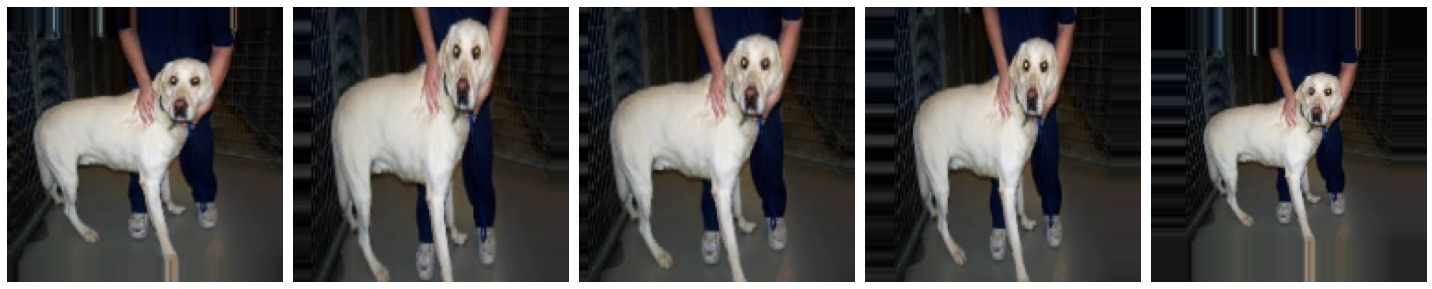

In [41]:
plotImages(augmented_images)


# Put it all together
Apply all the previous augmentations. Here, you applied rescale, 45 degree rotation, width shift, height shift, horizontal flip and zoom augmentation to the training images.

In [42]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )


In [43]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')


Found 2000 images belonging to 2 classes.


# Visualize how a single image would look five different times when passing these augmentations randomly to the dataset.

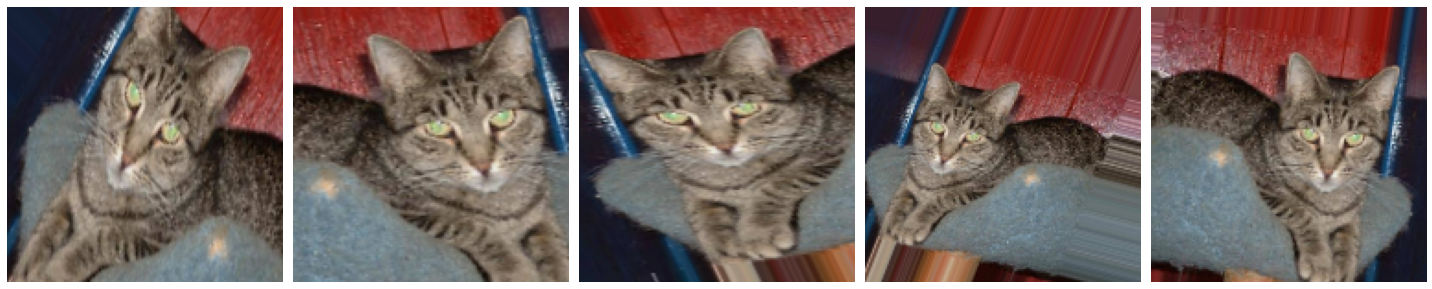

In [44]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)


# Create validation data generator

Generally, only apply data augmentation to the training examples. In this case, only rescale the validation images and convert them into batches using ImageDataGenerator.



In [45]:
image_gen_val = ImageDataGenerator(rescale=1./255)


In [46]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')


Found 1000 images belonging to 2 classes.


# Dropout

# Creating a new network with Dropouts

In [47]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])


# Compile the model

After introducing dropouts to the network, compile the model and view the layers summary.

In [48]:
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model_new.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)       

# Train the model

After successfully introducing data augmentations to the training examples and adding dropouts to the network, train this new network:



In [49]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)


Epoch 1/15
15/15 [==============================] - 38s 3s/step - loss: 1.1254 - acc: 0.4797 - val_loss: 0.6934 - val_acc: 0.5011
Epoch 2/15
15/15 [==============================] - 37s 2s/step - loss: 0.6932 - acc: 0.4968 - val_loss: 0.6931 - val_acc: 0.5011
Epoch 3/15
15/15 [==============================] - 36s 2s/step - loss: 0.6931 - acc: 0.5064 - val_loss: 0.6931 - val_acc: 0.5011
Epoch 4/15
15/15 [==============================] - 36s 2s/step - loss: 0.6930 - acc: 0.5037 - val_loss: 0.6929 - val_acc: 0.5011
Epoch 5/15
15/15 [==============================] - 36s 2s/step - loss: 0.6924 - acc: 0.4906 - val_loss: 0.6918 - val_acc: 0.5011
Epoch 6/15
15/15 [==============================] - 36s 2s/step - loss: 0.6906 - acc: 0.5085 - val_loss: 0.6912 - val_acc: 0.5011
Epoch 7/15
15/15 [==============================] - 36s 2s/step - loss: 0.6893 - acc: 0.4968 - val_loss: 0.6897 - val_acc: 0.5011
Epoch 8/15
15/15 [==============================] - 35s 2s/step - loss: 0.6871 - acc: 0.49

# Visualize the model

Visualize the new model after training, you can see that there is significantly less overfitting than before. The accuracy should go up after training the model for more epochs.



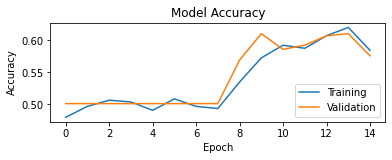

In [54]:
plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')






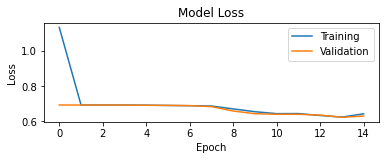

In [55]:
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
